In [50]:
%load_ext autoreload 
%autoreload 2
from jimFisher.Fisher import FisherSamples
import matplotlib.pyplot as plt
import corner
import numpy as np
from jimFisher.utils import LABELS, convert_to_physical

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
fisher = FisherSamples(name="CE", fmin = 20, fmax = 1024, sensitivity="CE", location="H1", duration=4, 
                  trigger_time=562678816.12345678,
                waveform="IMRPhenomD", f_ref=20.0)

In [42]:
true_params = {"chirp_mass": 59, "mass_ratio": 0.5, "s1_z": 0.1, "s2_z":0.1, 
              "luminosity_distance": 2000, "phase_c": 0.2, "cos_iota": 0.5, "ra": 1.1,
              "sin_dec": np.sin(0.1), 'psi': 0.3, "t_c": 0.0, "s1_x": 0.0, "s1_y":0.0, "s2_x": 0.0, "s2_y": 0.0}


In [43]:
fisher.set_at_true(true_params)

In [44]:
fisher.set_observed_properties(max_iterations=100)

 51%|█████     | 51/100 [00:23<00:22,  2.21it/s]

Converged after 51 iterations


In [45]:
observed_samples = fisher.draw_physical_samples(10000)


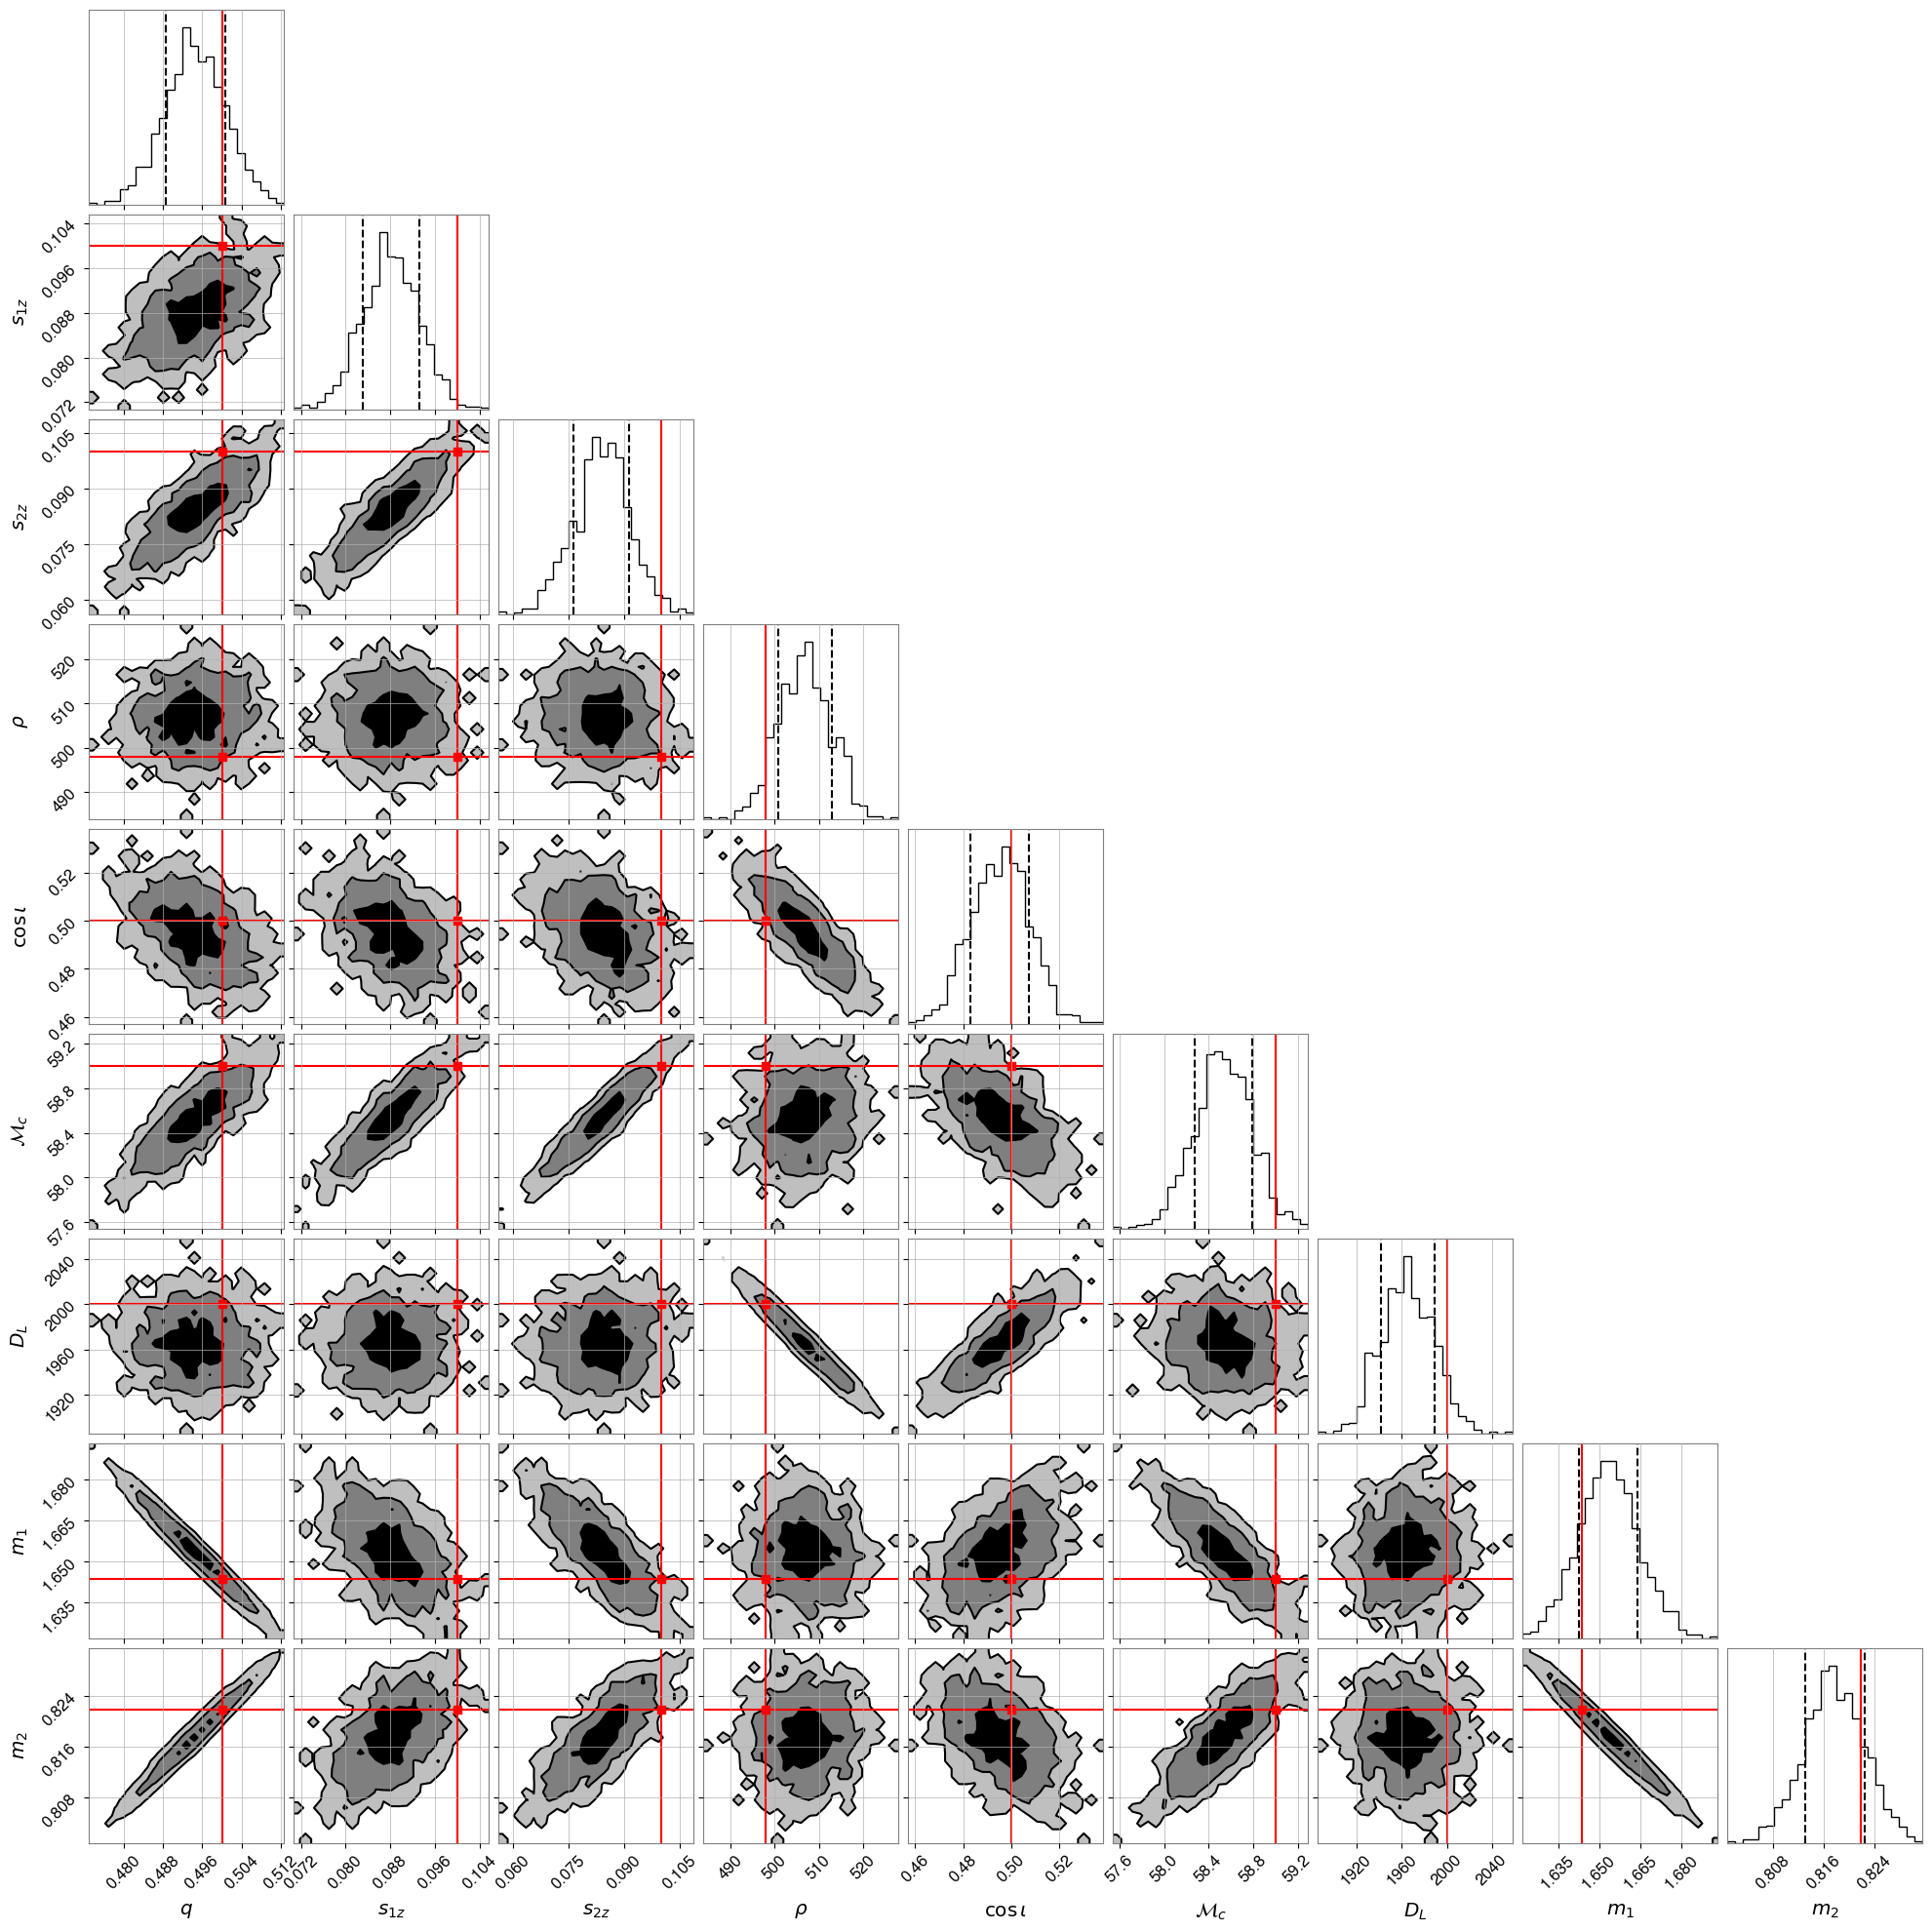

In [51]:
corner_kwargs = dict(
    bins=25, smooth=0.5,
    title_kwargs=dict(fontsize=16), 
    truth_color='r', quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
    plot_density=True, plot_datapoints=True, fill_contours=True,
)

corner.corner(observed_samples, truths=[convert_to_physical(fisher.true_parameters)[key] for key in observed_samples],
              labels=[LABELS[key] for key in observed_samples], **corner_kwargs)